In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('data.csv')

In [3]:
data

,Starting value,Ending value
0,16000,15081
1,18000,18085
2,20000,19081
3,15086,16000
4,18075,19010


In [4]:
data.isnull().sum()

Starting value    0
Ending value      0
dtype: int64

Text(0.5, 1.0, 'money value fluctuation')

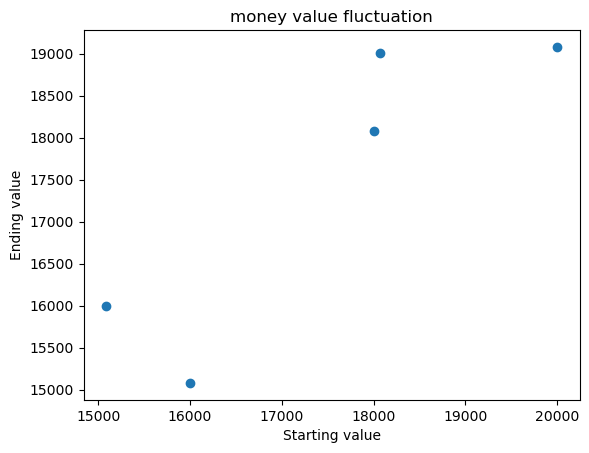

In [5]:
plt.scatter(data['Starting value'],data['Ending value'])
plt.xlabel('Starting value')
plt.ylabel('Ending value')
plt.title('money value fluctuation')

In [6]:
x = data['Starting value']
x

0    16000
1    18000
2    20000
3    15086
4    18075
Name: Starting value, dtype: int64

In [7]:
y = data['Ending value']
y

0    15081
1    18085
2    19081
3    16000
4    19010
Name: Ending value, dtype: int64

In [8]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

reg.fit(x.values.reshape(-1,1),y)

LinearRegression()

In [9]:
x.mean()

17432.2

In [10]:
y.mean()

17451.4

Text(0.5, 1.0, 'money value fluctuation')

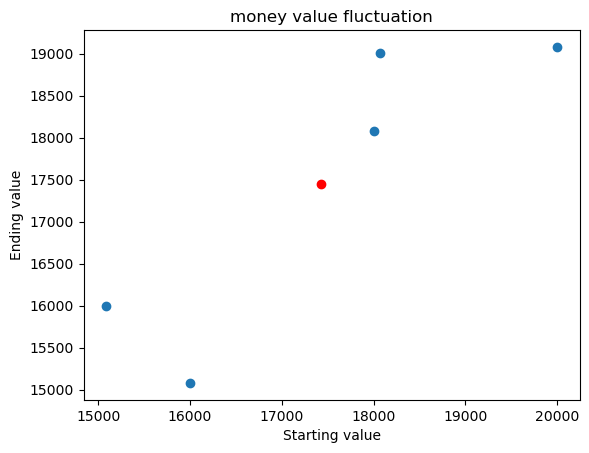

In [11]:
plt.scatter(x.mean(), y.mean(), color='red')
plt.scatter(data['Starting value'] , data['Ending value'])
plt.xlabel('Starting value')
plt.ylabel('Ending value')
plt.title('money value fluctuation')

In [12]:
m = reg.coef_
m

array([0.82944199])

In [13]:
c = reg.intercept_
c

2992.4012770596582

In [14]:
m*16000 + c

array([16263.47317659])

In [15]:
reg.predict([[16000]])

array([16263.47317659])

In [16]:
data['predicted_y'] = reg.predict(x.values.reshape(-1,1))

In [17]:
data

,Starting value,Ending value,predicted_y
0,16000,15081,16263.473177
1,18000,18085,17922.357164
2,20000,19081,19581.241151
3,15086,16000,15505.363194
4,18075,19010,17984.565314


Text(0.5, 1.0, 'money value Fluctuations')

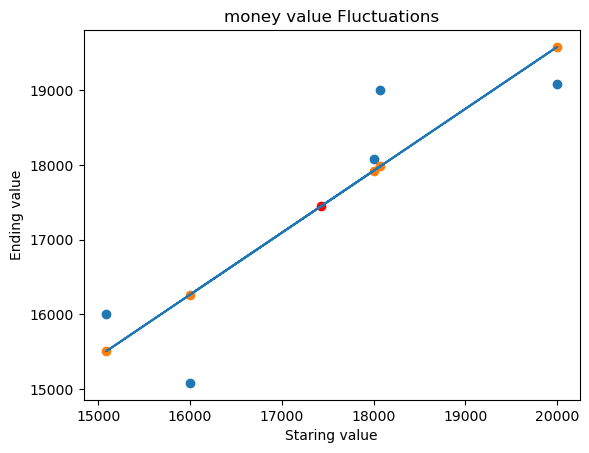

In [18]:
plt.plot(x.values.reshape(-1,1),data['predicted_y'])
plt.scatter(x.mean(),y.mean(),color = 'red')
plt.scatter(data['Starting value'],data['Ending value'])
plt.scatter(data['Starting value'],reg.predict(x.values.reshape(-1,1)))
plt.xlabel('Staring value')
plt.ylabel('Ending value')
plt.title('money value Fluctuations')

In [19]:
data['Lose'] = data['Ending value'] - data['predicted_y']

In [20]:
data

,Starting value,Ending value,predicted_y,Lose
0,16000,15081,16263.473177,-1182.473177
1,18000,18085,17922.357164,162.642836
2,20000,19081,19581.241151,-500.241151
3,15086,16000,15505.363194,494.636806
4,18075,19010,17984.565314,1025.434686


In [21]:
from sklearn.metrics import mean_squared_error , mean_absolute_error

In [22]:
mse = mean_squared_error(data['Ending value'], data['predicted_y'])
mse

594223.7161502176

In [23]:
mac = mean_absolute_error(data['Ending value'], data['predicted_y'])
mac

673.0857312277509

In [24]:
sum(abs(data['Lose']))/ len(x)

673.0857312277509

In [25]:
reg.score(x.values.reshape(-1, 1), y)


0.775113520317445

In [30]:
from sklearn.metrics import r2_score
r2_score(x.values.reshape(-1,1),y)

0.7711817548210562